## patent-exploratory-data-analysis-8_alloys

### Data Dictionary

df_patents (dataframe)

titles -- patent titles

dates -- issue date of patents

num_inventors -- number or inventors

num_pc -- number of patent citations

num_npc -- number of non-patent citations

num_rb -- number of references by other patents

num_class -- number of patent classifications

num_le -- number of legal events

### Create plots for date and time plots. 

In [3]:
import numpy as np
import pandas as pd

df_patents = pd.read_csv('/Users/stevehansen/Desktop/output_alloys.csv')
print (df_patents.head(4))

df_patents = df_patents.drop(['Unnamed: 0'], axis=1)
df_patents = df_patents.drop(['num_patent'], axis=1)

   Unnamed: 0 patent_no                                       url  \
0           0   9637179  https://www.google.com/patents/US9637179   
1           1   9636784  https://www.google.com/patents/US9636784   
2           2   9634324  https://www.google.com/patents/US9634324   
3           3   9634123  https://www.google.com/patents/US9634123   

                                               title issue_date       date  \
0  Aluminum alloy vehicle structural component de...     5/2/17   2-May-17   
1                           Mixed alloy solder paste     5/2/17   2-May-17   
2  Nickel-metal hydride battery and method for pr...    4/25/17  25-Apr-17   
3  FinFET device including a dielectrically isola...    4/25/17  25-Apr-17   

   num_patent  num_inventor  num_pc  num_npc  num_rb  num_class  num_le  
0       10136             5      22        1       0         13       0  
1       10135             2       6        2       0         81       0  
2       10134             3      12      

### Reverse the order of the dataframe.  See:  http://www.marsja.se/six-ways-to-reverse-pandas-dataframe/

In [4]:
df_patents = df_patents.iloc[::-1]

# Renumber the index so that the plots are numbered correctly. 
df_patents = df_patents.reset_index()
del df_patents['index']

print (df_patents.head(4))       # Looks okay.

  patent_no                                       url  \
0   3930575  https://www.google.com/patents/US3930575   
1   3930848  https://www.google.com/patents/US3930848   
2   3930895  https://www.google.com/patents/US3930895   
3   3930899  https://www.google.com/patents/US3930899   

                                               title issue_date      date  \
0  Method for a surface treatment of an iron, fer...     1/6/76  6-Jan-76   
1          High temperature low density cobalt alloy     1/6/76  6-Jan-76   
2         Special magnesium-manganese aluminum alloy     1/6/76  6-Jan-76   
3  Method of spraying molybdenum on aluminum or a...     1/6/76  6-Jan-76   

   num_inventor  num_pc  num_npc  num_rb  num_class  num_le  
0             3       6        2       2          5       0  
1             1       1        0       0          5       0  
2             2       7        0      35         11       0  
3             3       5        0       3         15       0  


### Get descriptive statistics of df_patents.

In [5]:
df_patents.describe()

,num_inventor,num_pc,num_npc,num_rb,num_class,num_le
count,10137.000000,10137.000000,10137.000000,10137.000000,10137.000000,10137.000000
mean,2.919108,12.997139,3.212785,15.647036,16.174213,4.176186
std,1.818188,24.138194,8.621308,41.604616,10.058189,2.722414
min,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.000000,5.000000,0.000000,2.000000,9.000000,2.000000
50%,3.000000,8.000000,0.000000,7.000000,14.000000,4.000000
75%,4.000000,15.000000,3.000000,18.000000,20.000000,6.000000
max,18.000000,981.000000,218.000000,2341.000000,116.000000,22.000000


In [6]:
df_patents.corr()

,num_inventor,num_pc,num_npc,num_rb,num_class,num_le
num_inventor,1.000000,0.029405,0.035690,-0.047597,0.041307,-0.015896
num_pc,0.029405,1.000000,0.625528,0.015457,0.116630,-0.058295
num_npc,0.035690,0.625528,1.000000,0.029300,0.082055,-0.028718
num_rb,-0.047597,0.015457,0.029300,1.000000,0.099630,0.121822
num_class,0.041307,0.116630,0.082055,0.099630,1.000000,0.029785
num_le,-0.015896,-0.058295,-0.028718,0.121822,0.029785,1.000000


### Prepare to plot various quantities. 

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


num_pcs = []
num_npcs = []
num_rbs = []
num_inventors = []
num_classes = []
num_les = []

# Number of reverse citations, num_pc.
value  = (df_patents['num_pc'])
num_pcs.append(value)
   

# Number of forward citations, num_rb.
value  = (df_patents['num_rb'])
num_rbs.append(value)
 
    
# Number of inventors, num_inventor.
value  = (df_patents['num_inventor'])
num_inventors.append(value)


# Number of non-patent citations, num_npc.
value  = (df_patents['num_npc'])
num_npcs.append(value)
   
    
# Number of legal events, num_le.
value  = (df_patents['num_le'])
num_les.append(value)
 
    
# Number of classifications, num_class
value  = (df_patents['num_class'])
num_classes.append(value)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### Plot No. of Forward Citations vs. other variables. 

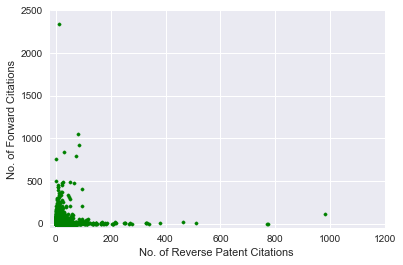

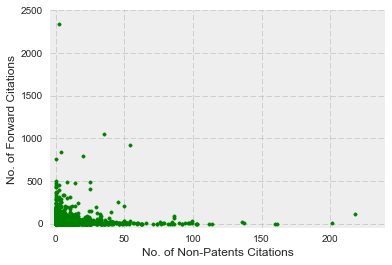

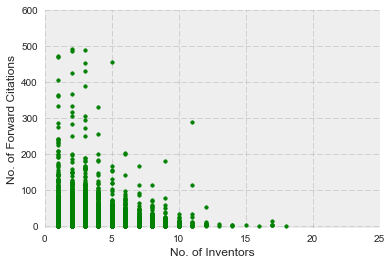

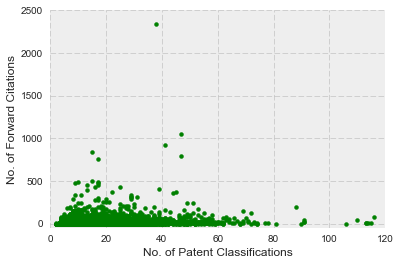

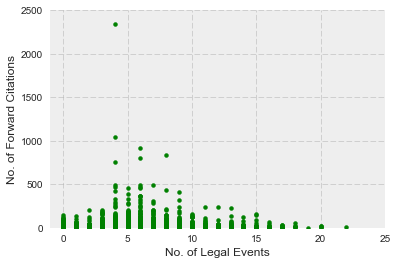

In [8]:
# No. of forward patent citations vs. No. of back patent references. 

plt.scatter(num_pcs, num_rbs, marker = 'o', color = 'green', s = 11 )
plt.xlabel("No. of Reverse Patent Citations ")
plt.ylabel("No. of Forward Citations")
plt.style.use('bmh')

ax = plt.axes()
ax.set(xlim=(-20,1200), ylim = (-50,2500))
plt.savefig('num_rb_vs_num-pc.png',dpi=800)
plt.show()


# Number of forward citations vs. number of (back) non-patent citations. 

plt.scatter(num_npcs, num_rbs,  marker = 'o', color = 'green', s = 11)
plt.xlabel("No. of Non-Patents Citations")
plt.ylabel("No. of Forward Citations")

ax = plt.axes()
ax.set(xlim=(-4,240), ylim = (-50,2500))
plt.savefig('rbs-vs-npcs.png',dpi=800)
plt.show()


# Number of inventors vs. number of forward citations. 

plt.scatter(num_inventors, num_rbs,  marker = 'o', color = 'green', s = 13 )
plt.xlabel("No. of Inventors")
plt.ylabel("No. of Forward Citations")

ax = plt.axes()
ax.set(xlim=(0,25), ylim = (-5,600))
plt.savefig('rbs-vs-inventors.png',dpi=800)

plt.show()


# Plot the number forward references vs. number of classifications. 

plt.scatter(num_classes, num_rbs,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Patent Classifications")
plt.ylabel("No. of Forward Citations")

ax = plt.axes()
ax.set(xlim=(0,120), ylim = (-50,2500))
plt.savefig('rbs-vs-classes.png',dpi=800)
plt.show()


# Plot the number of forward citations vs. number of legal events.  

plt.scatter(num_les, num_rbs,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Legal Events")
plt.ylabel("No. of Forward Citations")

ax = plt.axes()
ax.set(xlim=(-1,25), ylim = (0,2500))
plt.savefig('rbs-vs-legal_events.png',dpi=800)
plt.show()

###   Plot No. of Reverse Patent Citations vs. other variables. 

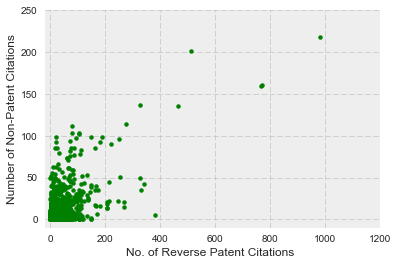

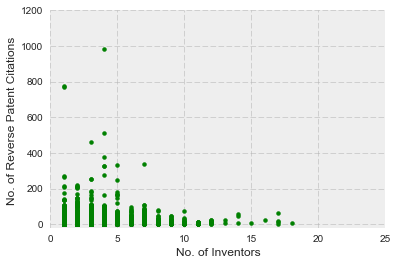

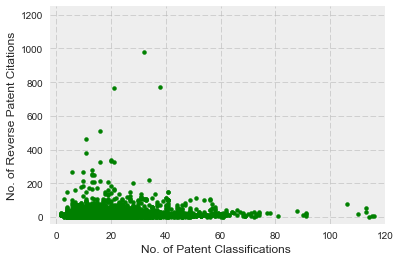

In [9]:
# Plot the number of Patent Citation versus Non-Patent Citations. 

plt.scatter(num_pcs, num_npcs,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Reverse Patent Citations ")
plt.ylabel("Number of Non-Patent Citations")
plt.style.use('bmh')

ax = plt.axes()
ax.set(xlim=(-20,1200), ylim = (-10,250))
plt.show()


# Plot the No. of inventors vs. No. of (back) patent citations.

plt.scatter(num_inventors, num_pcs, marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Inventors")
plt.ylabel("No. of Reverse Patent Citations ")


ax = plt.axes()
ax.set(xlim=(0,25), ylim = (-20,1200))
plt.show()


# Plot the No. of patent classifications vs. No. of (back) patent citations.

plt.scatter(num_classes, num_pcs,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Patent Classifications ")
plt.ylabel("No. of Reverse Patent Citations")

ax = plt.axes()
ax.set(xlim=(-2,120), ylim = (-40,1250))

plt.show()

### Plot No. of Non-Patent Citations vs. other variables.

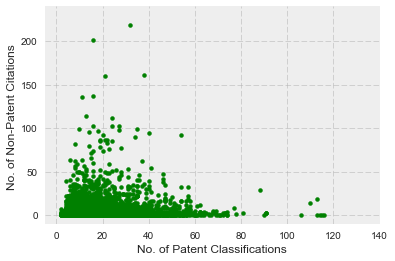

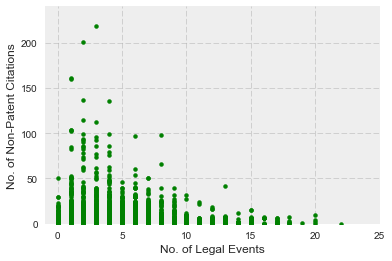

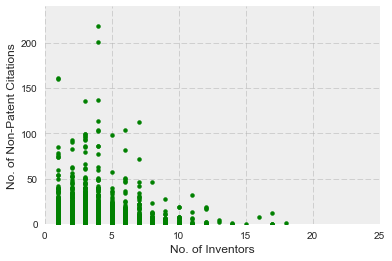

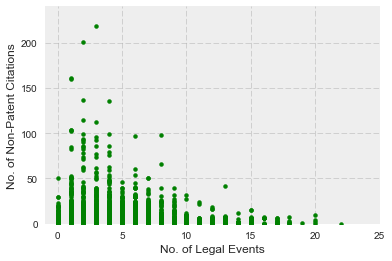

In [10]:
# Plot the No. of patent classifications vs. No. of (back) patent citations.

plt.scatter(num_classes, num_npcs, marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Patent Classifications")
plt.ylabel("No. of Non-Patent Citations ")
plt.style.use('bmh')

ax = plt.axes()
ax.set(xlim=(-5,140), ylim = (-10,240))

plt.show()


# Plot the number of non-patent citations vs. number of legal events.  

plt.scatter(num_les, num_npcs,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Legal Events")
plt.ylabel("No. of Non-Patent Citations")

ax = plt.axes()
ax.set(xlim=(-1,25), ylim = (0,240))

plt.show()


# Plot the number of non-patent citations vs. number of inventors. 

plt.scatter(num_inventors, num_npcs,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Inventors")
plt.ylabel("No. of Non-Patent Citations")

ax = plt.axes()
ax.set(xlim=(0,25), ylim = (0,240))

plt.show()


# Plot the number of non-patent citations vs. number of patent classifications.  

plt.scatter(num_les, num_npcs,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Legal Events")
plt.ylabel("No. of Non-Patent Citations")

ax = plt.axes()
ax.set(xlim=(-1,25), ylim = (0,240))

plt.show()


### Plot the No. of inventors vs. No. of patent classifications. 

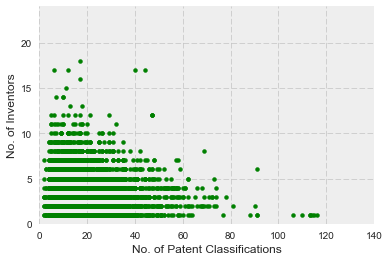

In [11]:
# Plot the No. of inventors vs. No. of patent classifications. 

plt.scatter(num_classes, num_inventors,  marker = 'o', color = 'green', s = 15 )
plt.xlabel("No. of Patent Classifications")
plt.ylabel("No. of Inventors")
plt.style.use('bmh')

ax = plt.axes()
ax.set(xlim=(0,140), ylim = (0,24))
plt.show()

### Seaborn correlation (color heat map) of inputs and outputs. 

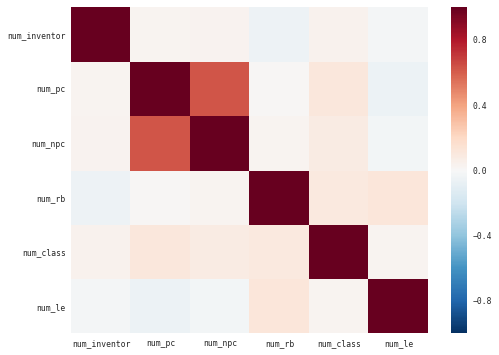

In [12]:
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")

# Load the datset of correlations.

corr = df_patents.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))


sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.savefig('correlation.png',dpi=600)

Forward references vs. No. of Inventors
Forward references vs. No. of Reverse Patent Citations
Forward references vs. No. of Non-Patent Citations


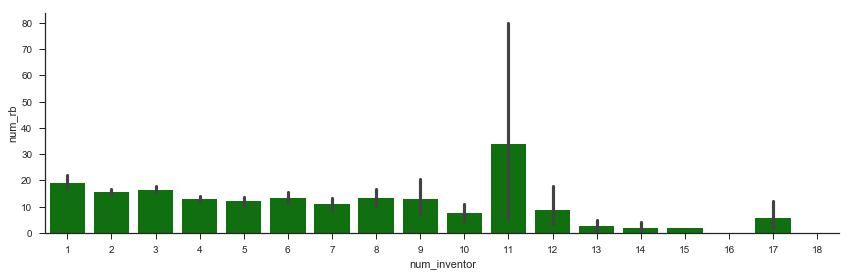

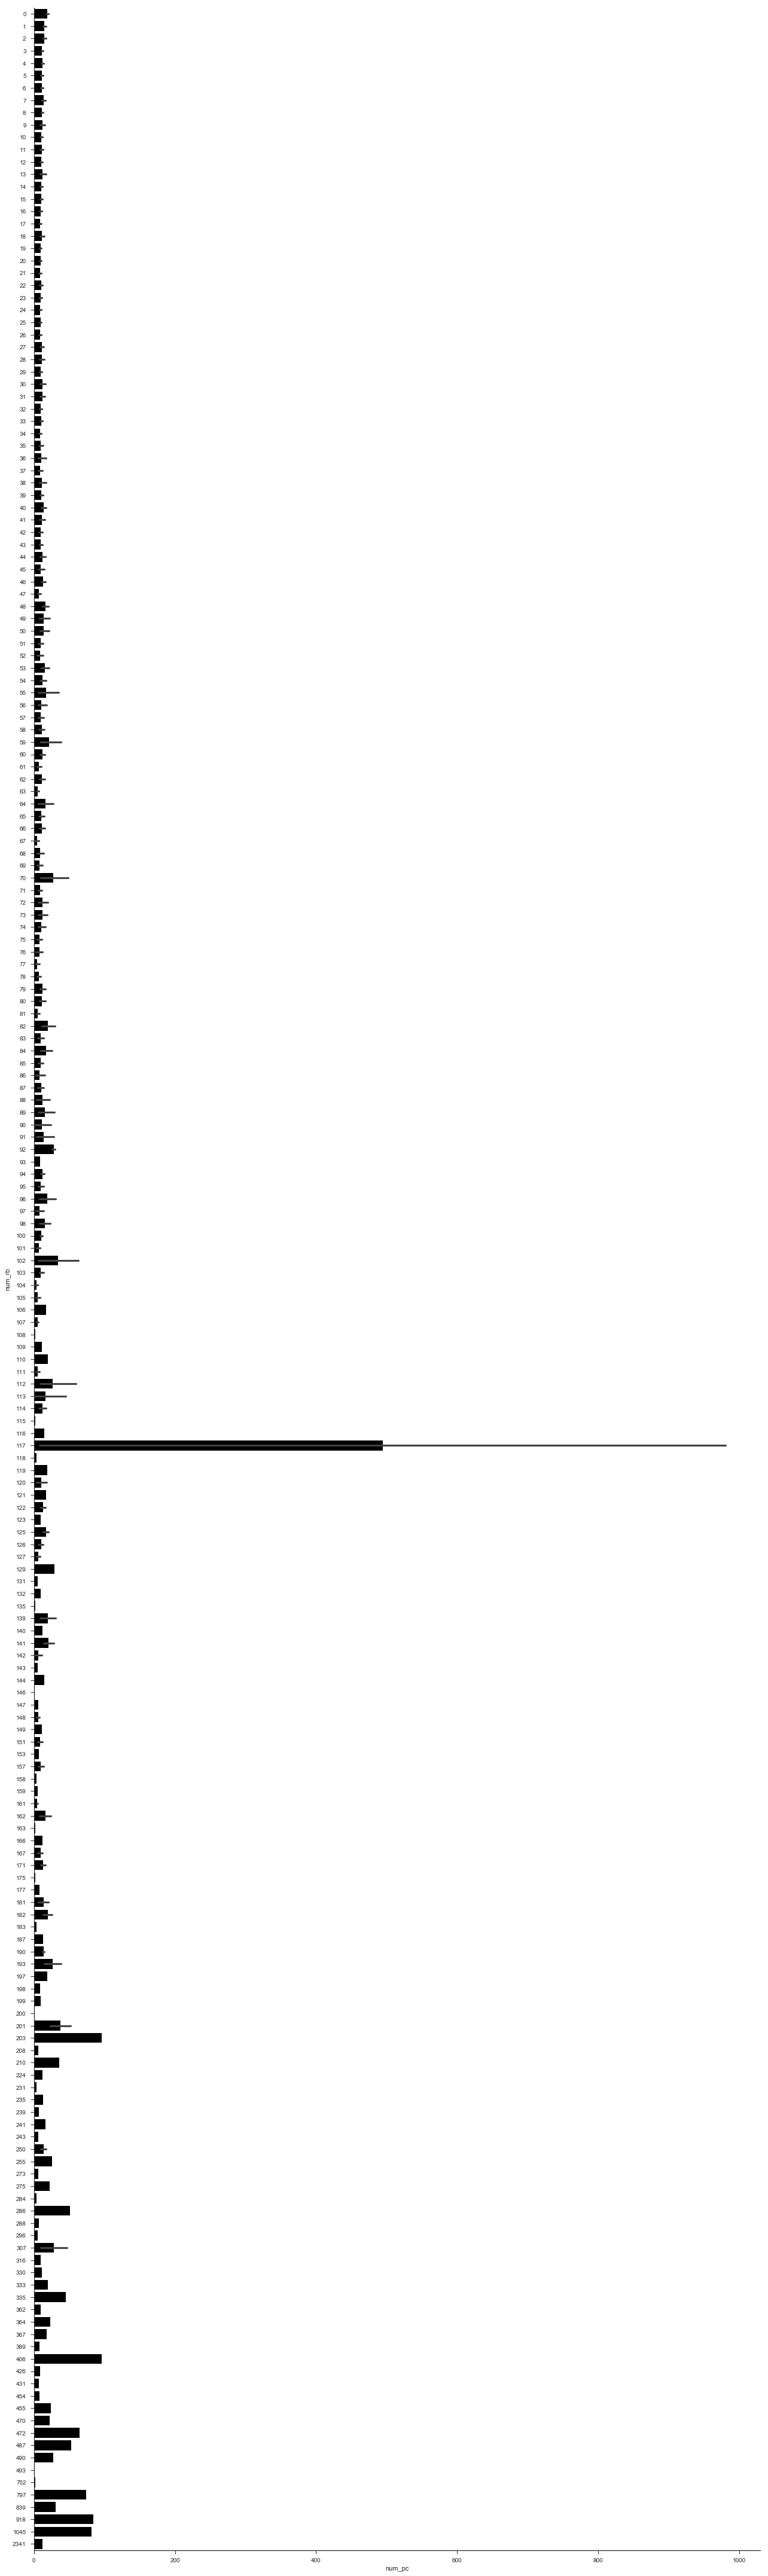

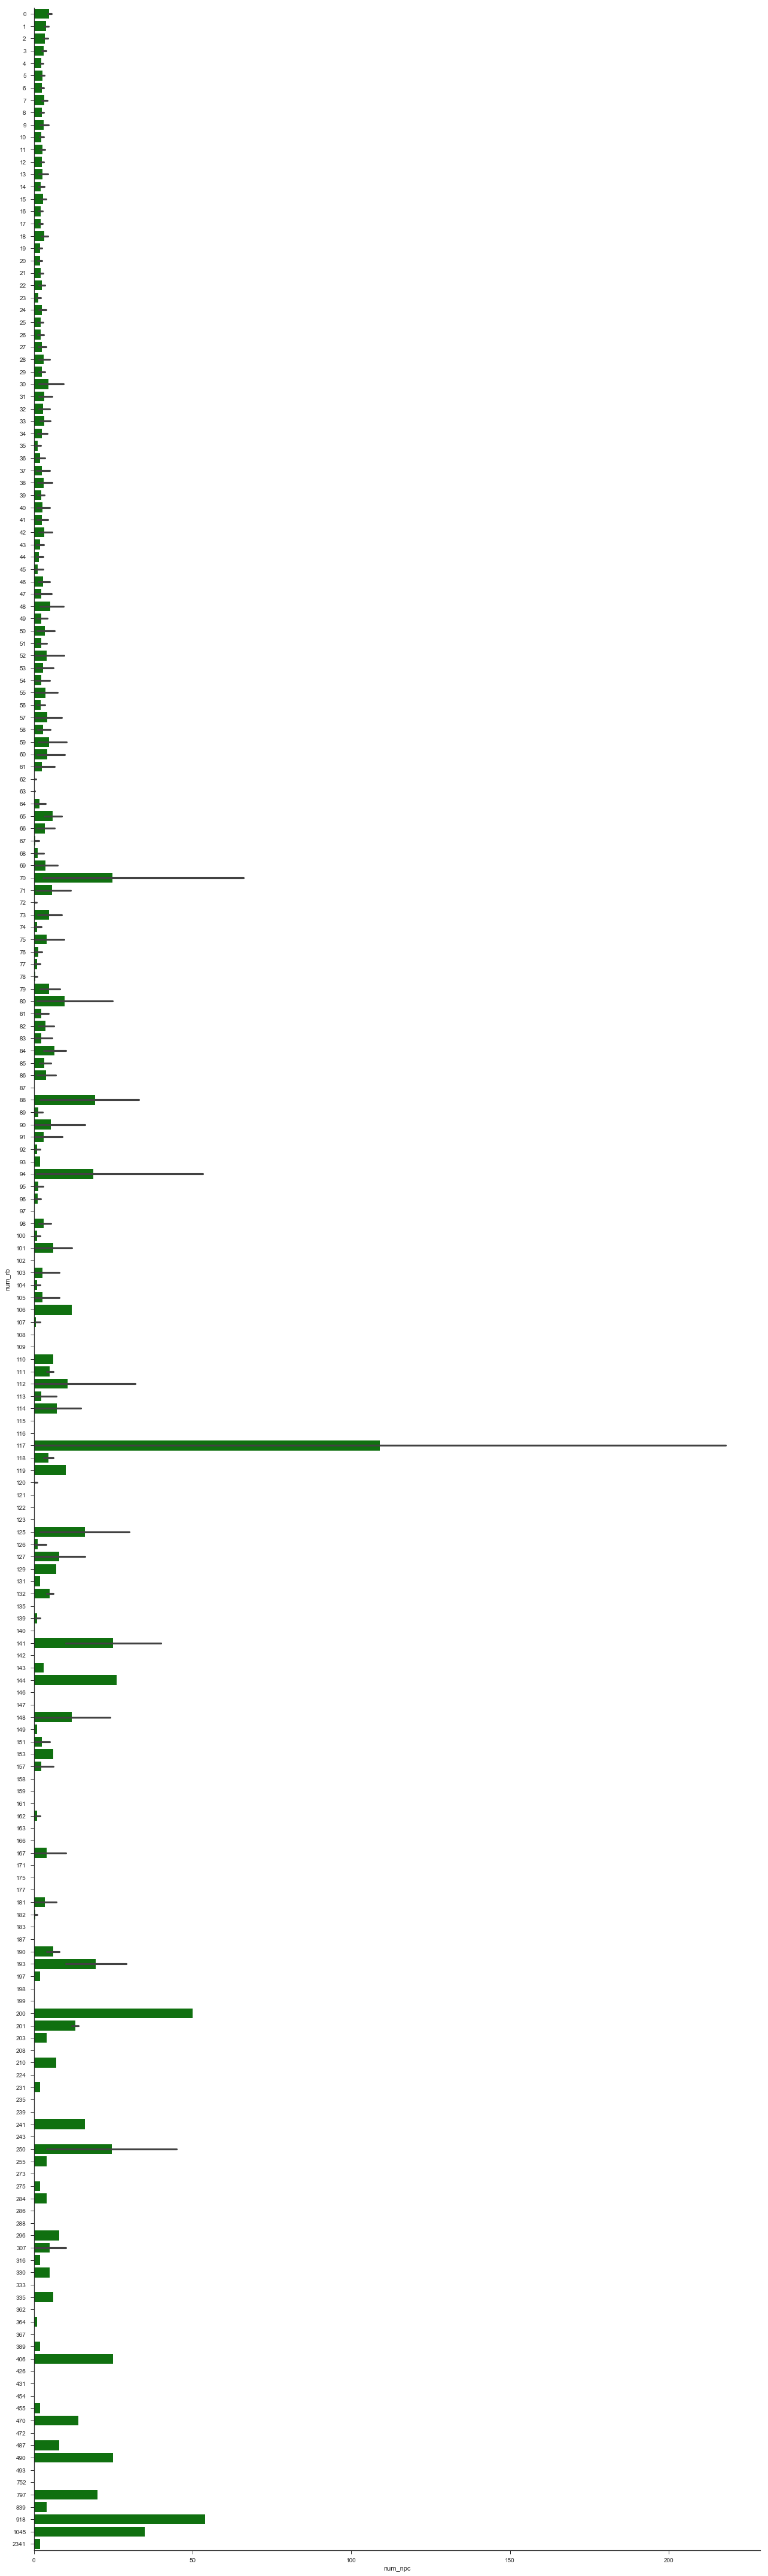

In [44]:
print ("Forward references vs. No. of Inventors")
sns.set(style="ticks")
g = sns.factorplot(x='num_inventor', y='num_rb', kind='bar', color='green', data=df_patents, aspect=3)


print ("Forward references vs. No. of Reverse Patent Citations")
sns.set(style="ticks")
g = sns.factorplot(x='num_pc', y='num_rb',orient='h', color='black', size=60, aspect=0.3, 
                   kind='bar', data=df_patents)

print ("Forward references vs. No. of Non-Patent Citations")
sns.set(style="ticks")
g = sns.factorplot(x="num_npc", y="num_rb", orient='h', kind='bar', color='green', 
                    size=60, aspect=0.3, data=df_patents)